**ASSIGNMENT 4: DATA 603**

**MRUNAL JADHAV**

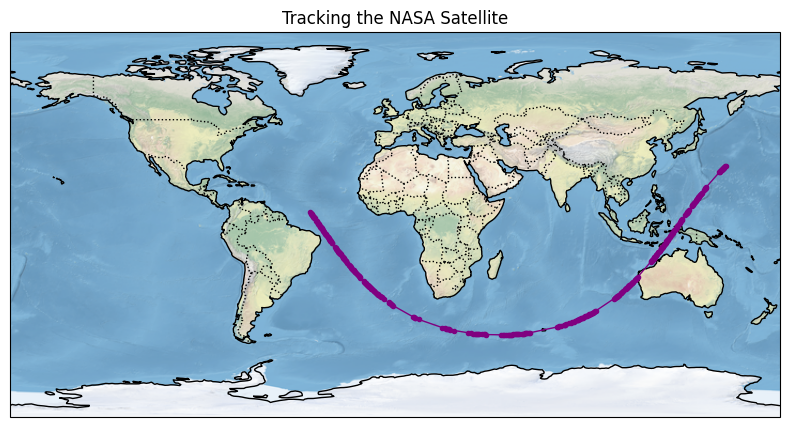

Both data and map is stored successfully!


In [3]:
# INSTALLING PACKAGE
!pip install cartopy requests pandas

#IMPORTING NECESSARY FILES
import time
import requests
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from IPython.display import clear_output

def ISS_tracking():
    longi = []
    lati = []

    data_url = 'http://api.open-notify.org/iss-now.json'

    #1hr data collection
    eta = time.time() + 60 * 60

    print('1 hour time tracking')

    while time.time() < eta:
        try:
            get_response = requests.get(data_url)
            get_data = get_response.json()

            if get_data['message'] == 'success':
                longitude = float(get_data['iss_position']['longitude'])
                latitude = float(get_data['iss_position']['latitude'])

                longi.append(longitude)
                lati.append(latitude)

                #clearing the output
                clear_output(wait=True)

                #Graph
                fig = plt.figure(figsize=(10, 5))
                axes = plt.axes(projection=ccrs.PlateCarree())
                axes.stock_img()
                axes.coastlines()
                axes.add_feature(cfeature.BORDERS, linestyle=':')

                axes.plot(longi, lati, marker='o', color='purple', markersize=3, linewidth=1, transform=ccrs.Geodetic())
                plt.title('Tracking the NASA Satellite')
                plt.show()

            else:
                print('API failed to return success message')

        except Exception as ex:
            print(f'Error: {ex}')

        time.sleep(5)

    #Final Result
    df = pd.DataFrame({'Longitude': longi, 'Latitude': lati})
    df.to_csv('iss_data.csv', index=False)
    fig.savefig("iss_map.png", dpi=300)
    print("Both data and map is stored successfully!")

ISS_tracking()
